<a href="https://colab.research.google.com/github/ardun12/InspectrumClinic_RecSys/blob/Artem-Dunaev-folder/Artem%20Dunaev/Dunaev_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#подгружаем библиотеки
#пока в колабе поработаю, он привычнее и тут машины мощнее моего компа
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input, concatenate
from tensorflow.keras.optimizers import Adam, Adadelta
from sklearn.model_selection import train_test_split 
import numpy as np
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json 

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time
import re

In [ ]:
#включаем диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#засовываем данные в переменную
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Стажировка/data2.xlsx')

In [ ]:
#смотрим
df.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#посмотрим на названия столбцов. много лишнего. считаю что достаточно будет столбцов содержащих код мкб.
column_list = df.columns.tolist()
column_list

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ДиспансернаяГруппа',
 'ДиспансернаяГруппаПредставление',
 'ВредныеФакторы',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема',
 'ЛабораторныеИсследования1_Салон',
 'ЛабораторныеИсследования1_СалонПредставление',
 'ЛабораторныеИсследования1_Специализация',
 'ЛабораторныеИсследования1_СпециализацияПредставление',
 'ЛабораторныеИсследования1_ХР_Рекомендация1',
 'ЛабораторныеИсследования1_ХР_Рекомендация1Представление',
 'ЛабораторныеИсследования1_ХР_Рекомендация2',
 'ЛабораторныеИсследования1_ХР_Рекомендация2Представление',
 'ЛабораторныеИсследования1_ХР_РекомендацияСтр',
 'ЛабораторныеИсследования1_ОАК_Значение',
 'ЛабораторныеИсследования1_ОАК

In [ ]:
#поудаляем все пустое
df_1 = df.dropna(axis=0, how='all')
df_2 = df_1.dropna(axis=1, how='all')

In [ ]:
#создаю список колонок с кодом мкб
df_list_1 = []
for i in column_list:
  if "МКБ" in i:
    df_list_1.append(i)

In [ ]:
df_list_1

['ПсихиатрияНаркология1_МКБ101',
 'Офтальмология1_МКБ101',
 'Оториноларингология1_МКБ101',
 'ХирургНеИсп1_МКБ101',
 'Гинекология1_МКБ101',
 'Стоматология1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Рентгенология1_МКБ101',
 'Неврология1_МКБ101',
 'Терапия1_МКБ101',
 'Хирургия1_МКБ101',
 'Офтальмология1_МКБ102',
 'Терапия2_МКБ101',
 'Неврология2_МКБ101',
 'ЛабораторныеИсследования1_МКБ101',
 'ЭКГНеИсп1_МКБ101',
 'УЗИДиагностика1_МКБ101',
 'УЗИДиагностика2_МКБ101',
 'ПсихиатрияНаркология2_МКБ101',
 'Терапия1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'Терапия1_МКБ103',
 'Психиатрия1_МКБ101',
 'Гинекология1_МКБ102',
 'Рентгенология2_МКБ101',
 'Гинекология2_МКБ101',
 'Хирургия2_МКБ101',
 'ПроцедурнаяМедсестра1_МКБ101',
 'ФункциональнаяДиагностика1_МКБ101',
 'УЗИДиагностика1_МКБ102',
 'Стоматология2_МКБ101',
 'Неврология1_МКБ102',
 'Оториноларингология2_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Хирургия1_МКБ102',
 'Хирургия2_МК

In [ ]:
# таблица на основе списка колонок
df2=df_2[df_list_1]

In [ ]:
df2

,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Рентгенология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Z00.0,Z00.0,NaN,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,I11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Z00.0,H52.1,NaN,NaN,NaN,NaN,Z00.0,NaN,NaN,Z00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Z00.0,Z00.0,Z00.0,NaN,Z00.0,NaN,NaN,Z00.0,Z00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,H52.2,Z00.0,NaN,NaN,Z00.0,NaN,NaN,Z00.0,Z00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,Z00.0,Z00.0,Z00.0,NaN,NaN,K02.1,Z00.0,NaN,Z00.0,Z00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,Z00.0,NaN,Z00.0,NaN,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# пока не возникло идей лучше, заполню пустоты по мкб нулями. по идее можно заполнить z00. вопрос, почему они пустые?
df2.fillna(0, inplace=True)

<ipython-input-11-0783cf99613a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


In [ ]:
df2

,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Рентгенология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Z00.0,Z00.0,0,0,0,0,Z00.0,Z00.0,Z00.0,I11.9,...,0,0,0,0,0,0,0,0,0,0
2,Z00.0,H52.1,0,0,0,0,Z00.0,0,0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Z00.0,Z00.0,Z00.0,0,Z00.0,0,0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
4,0,H52.2,Z00.0,0,0,Z00.0,0,0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,Z00.0,Z00.0,Z00.0,0,0,K02.1,Z00.0,0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1980,Z00.0,0,Z00.0,0,Z00.0,0,Z00.0,0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Берем остальные важные для оценки профпатологм колонки
df3=df[[
  'КлиентДатаРождения',
  'КлиентПол',
  'Профессия',
  'ЗаключениеМК',
  'ДиспансернаяГруппа',
  'ВредныеФакторы']]

In [ ]:
df3

,КлиентДатаРождения,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы
0,1976-10-24,Женский,Ведущий специалист по организации обуения,Годен,I,11.4
1,1987-11-18,Мужской,Ведущий специалист,Годен,IIIа,4.2.5
2,1985-09-08,Мужской,Главный менеджер,ГоденСКоррекциейЗрения,II,4.2.5
3,1988-04-25,Мужской,Главный специалист,Годен,I,11.1
4,1984-04-17,Мужской,Старший специалист,ГоденСКоррекциейЗрения,II,11.1
...,...,...,...,...,...,...
1977,1972-11-12,Мужской,Директор по строительству,NaN,NaN,6.1
1978,1986-07-09,Мужской,Начальник производственно-технического отдела,NaN,NaN,6.1
1979,1994-05-12,Мужской,Помощник кладовщика,NaN,NaN,"5.1,23"
1980,1972-04-17,Женский,Повар,NaN,NaN,23


In [ ]:
# конкатинируем два датасета
df_full=pd.concat([df3,df2], axis=1, sort=False)

In [ ]:
df_full

,КлиентДатаРождения,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,1976-10-24,Женский,Ведущий специалист по организации обуения,Годен,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1,1987-11-18,Мужской,Ведущий специалист,Годен,IIIа,4.2.5,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985-09-08,Мужской,Главный менеджер,ГоденСКоррекциейЗрения,II,4.2.5,Z00.0,H52.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1988-04-25,Мужской,Главный специалист,Годен,I,11.1,0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
4,1984-04-17,Мужской,Старший специалист,ГоденСКоррекциейЗрения,II,11.1,0,H52.2,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1972-11-12,Мужской,Директор по строительству,NaN,NaN,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,1986-07-09,Мужской,Начальник производственно-технического отдела,NaN,NaN,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,1994-05-12,Мужской,Помощник кладовщика,NaN,NaN,"5.1,23",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1980,1972-04-17,Женский,Повар,NaN,NaN,23,Z00.0,0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# дропаю строки без заключения
df_full_1=df_full.dropna(subset=['ЗаключениеМК'])
df_full_1

,КлиентДатаРождения,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,1976-10-24,Женский,Ведущий специалист по организации обуения,Годен,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1,1987-11-18,Мужской,Ведущий специалист,Годен,IIIа,4.2.5,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985-09-08,Мужской,Главный менеджер,ГоденСКоррекциейЗрения,II,4.2.5,Z00.0,H52.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1988-04-25,Мужской,Главный специалист,Годен,I,11.1,0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
4,1984-04-17,Мужской,Старший специалист,ГоденСКоррекциейЗрения,II,11.1,0,H52.2,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1993-12-29,Мужской,Инженер,Годен,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1962,1989-07-10,Мужской,Начальник лаборатории,Годен,I,4.4,Z00.0,0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1972,1987-02-04,Мужской,"Инженер по бурению 1 категории, непосредственн...",Годен,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1973,1993-02-04,Мужской,Приемщик вагонов в депо,Годен,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_full_1['КлиентДатаРождения'] = pd.to_datetime(df_full_1['КлиентДатаРождения'], errors="coerce")
df_full_1["Возраст"] = \
    (pd.to_datetime("today") - df_full_1["КлиентДатаРождения"]).astype('<m8[Y]')

<ipython-input-18-b3a31f71bf19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1['КлиентДатаРождения'] = pd.to_datetime(df_full_1['КлиентДатаРождения'], errors="coerce")
<ipython-input-18-b3a31f71bf19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1["Возраст"] = \


In [ ]:
df_full_1['КлиентДатаРождения']=df_full_1["Возраст"]

<ipython-input-19-d8f2baee0d43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_1['КлиентДатаРождения']=df_full_1["Возраст"]


In [ ]:
df_full_1 = df_full_1.drop(columns='Возраст')

In [ ]:
df_full_1.loc[df_full_1['КлиентПол'] == "Женский", 'КлиентПол'] = 0
df_full_1.loc[df_full_1['КлиентПол'] == "Мужской", 'КлиентПол'] = 1

In [ ]:
df_full_1

,КлиентДатаРождения,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,46.0,0,Ведущий специалист по организации обуения,Годен,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1,35.0,1,Ведущий специалист,Годен,IIIа,4.2.5,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37.0,1,Главный менеджер,ГоденСКоррекциейЗрения,II,4.2.5,Z00.0,H52.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,1,Главный специалист,Годен,I,11.1,0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
4,39.0,1,Старший специалист,ГоденСКоррекциейЗрения,II,11.1,0,H52.2,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,29.0,1,Инженер,Годен,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1962,33.0,1,Начальник лаборатории,Годен,I,4.4,Z00.0,0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1972,36.0,1,"Инженер по бурению 1 категории, непосредственн...",Годен,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1973,30.0,1,Приемщик вагонов в депо,Годен,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_full_1["КлиентДатаРождения"]=df_full_1["КлиентДатаРождения"].astype (int)

In [ ]:
df_full_1

,КлиентДатаРождения,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,46,0,Ведущий специалист по организации обуения,Годен,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1,35,1,Ведущий специалист,Годен,IIIа,4.2.5,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,1,Главный менеджер,ГоденСКоррекциейЗрения,II,4.2.5,Z00.0,H52.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,Главный специалист,Годен,I,11.1,0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,0
4,39,1,Старший специалист,ГоденСКоррекциейЗрения,II,11.1,0,H52.2,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,29,1,Инженер,Годен,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1962,33,1,Начальник лаборатории,Годен,I,4.4,Z00.0,0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1972,36,1,"Инженер по бурению 1 категории, непосредственн...",Годен,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0
1973,30,1,Приемщик вагонов в депо,Годен,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def getParameterAgeVect(arg):
    outClass =int((arg-13)/5)
    outClass = max(0, min(10,outClass))
    return outClass

In [ ]:
df_full_1['ВозрастКатегория'] = df_full_1['КлиентДатаРождения'].apply(getParameterAgeVect)

In [ ]:
df_full_1['ВозрастКатегория']

0       6
1       4
2       4
3       4
4       5
       ..
1961    3
1962    4
1972    4
1973    3
1981    7
Name: ВозрастКатегория, Length: 1575, dtype: int64

In [ ]:
df_full_1 = df_full_1.drop(columns='КлиентДатаРождения')

In [ ]:
#df_full_experiment_1 = df_full_1.drop(columns=['Клиент', "ПсихОсвидетельствование", "Профессия", "ДиспансернаяГруппа", "ВредныеФакторы"])

In [ ]:
#df_full_experiment_1

In [ ]:
df_full_1["ЗаключениеМК"].unique ()

array(['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах',
       'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден',
       'ОграниченноГоден', 'машинист бульдозера', 'Газоспасатель',
       ' Газоспасатель'], dtype=object)

In [ ]:
#df_full_experiment_1 = df_full_experiment_1.drop(np.where(df_full_experiment_1['ЗаключениеМК'] == "машинист бульдозера")[0])

In [ ]:
new = df_full_1.loc[~df['ЗаключениеМК'].isin(["машинист бульдозера", 'Газоспасатель', ' Газоспасатель'])]

In [ ]:
new["ЗаключениеМК"].unique()

array(['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах',
       'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден',
       'ОграниченноГоден'], dtype=object)

попробую подразделить на 2 класса

In [ ]:
new.loc[new['ЗаключениеМК'] == "Годен", 'ЗаключениеМК'] = 0
new.loc[new['ЗаключениеМК'] == "ГоденСКоррекциейЗрения", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "ГоденБезРаботНаВысотах", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "НуждаетсяВДообследованииИЛечении", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "ВременноНегоден", 'ЗаключениеМК'] = 1
new.loc[new['ЗаключениеМК'] == "ОграниченноГоден", 'ЗаключениеМК'] = 1

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,IIIа,4.2.5,Z00.0,Z00.0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,II,4.2.5,Z00.0,H52.1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,I,11.1,0,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,II,11.1,0,H52.2,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,I,4.4,Z00.0,0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
for col in new:
 print(new[col].unique())

[0 1]
['Ведущий специалист по организации обуения' 'Ведущий специалист'
 'Главный менеджер' 'Главный специалист' 'Старший специалист'
 'Начальник отдела' 'Старший инженер' 'Ведущий инженер ' 'Специалист '
 'Специалист' 'Ведущий специалист ' 'Мойщик ВС 2 разряда'
 'Кладовщик-комплектовщик' 'Кладовщик комплектовщик' 'Мойщик службы БОВС'
 'Старший кладовщик' 'Комплектовщик' 'Уборщик производственных помещений'
 'Агент-комплектовщик' 'Уборщик производственных помещений '
 'ведущий инженер' 'Руководитель сектора ' 'Ведущий инженер'
 'Старшй инженер' 'Старший специалист ' 'Официант' 'Ведущий геодезист'
 'Техник' 'Старший техник' 'Главный специалист '
 'управление наземными транспортными средствами (кат В)'
 'Слесарь-сантехник' 'Слесарь по ремонту автомобилей 6 разряда'
 'Слесарь по ремонту автомобилей' 'Мерчендайзер '
 'Геофизик полевого вычислительного центра 1 категории'
 'Инженер 1 категории (радиосвязь и системы синхронизации))'
 'машинист экструдера' 'Испытатель двигателей 5 разряда' 'П

In [ ]:
list_of_alf=(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
list_of_alf

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
for i in list_of_alf:
  print("     new[i] = new[i].astype(str).str.replace(","'",i,"',","'","0.",25-list_of_alf.index(i)+1,"'",")", sep='')

     new[i] = new[i].astype(str).str.replace('A','0.26')
     new[i] = new[i].astype(str).str.replace('B','0.25')
     new[i] = new[i].astype(str).str.replace('C','0.24')
     new[i] = new[i].astype(str).str.replace('D','0.23')
     new[i] = new[i].astype(str).str.replace('E','0.22')
     new[i] = new[i].astype(str).str.replace('F','0.21')
     new[i] = new[i].astype(str).str.replace('G','0.20')
     new[i] = new[i].astype(str).str.replace('H','0.19')
     new[i] = new[i].astype(str).str.replace('I','0.18')
     new[i] = new[i].astype(str).str.replace('J','0.17')
     new[i] = new[i].astype(str).str.replace('K','0.16')
     new[i] = new[i].astype(str).str.replace('L','0.15')
     new[i] = new[i].astype(str).str.replace('M','0.14')
     new[i] = new[i].astype(str).str.replace('N','0.13')
     new[i] = new[i].astype(str).str.replace('O','0.12')
     new[i] = new[i].astype(str).str.replace('P','0.11')
     new[i] = new[i].astype(str).str.replace('Q','0.10')
     new[i] = new[i].astype(str

In [ ]:
new2=new.copy()

In [ ]:
new2

,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,IIIа,4.2.5,Z00.0,Z00.0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,II,4.2.5,Z00.0,H52.1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,I,11.1,0,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,II,11.1,0,H52.2,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,I,4.4,Z00.0,0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
new2.fillna(0, inplace=True)

In [ ]:
new2

,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,IIIа,4.2.5,Z00.0,Z00.0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,II,4.2.5,Z00.0,H52.1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,I,11.1,0,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,II,11.1,0,H52.2,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,I,4.4,Z00.0,0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
new.fillna(0, inplace=True)

<ipython-input-41-8cba954ed67a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.fillna(0, inplace=True)


In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,I,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,IIIа,4.2.5,Z00.0,Z00.0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,II,4.2.5,Z00.0,H52.1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,I,11.1,0,Z00.0,Z00.0,Z00.0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,II,11.1,0,H52.2,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,I,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,I,4.4,Z00.0,0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,I,3.1.8.2,Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,I,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
for i in df_list_1:
  new[i] = new[i].astype(str).str.replace('.','')

<ipython-input-43-7b0ed68127fe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new[i] = new[i].astype(str).str.replace('.','')
<ipython-input-43-7b0ed68127fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[i] = new[i].astype(str).str.replace('.','')


In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ДиспансернаяГруппа,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,I,11.4,Z000,Z000,Z000,Z000,Z000,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,IIIа,4.2.5,Z000,Z000,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,II,4.2.5,Z000,H521,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,I,11.1,0,Z000,Z000,Z000,0,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,II,11.1,0,H522,Z000,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,I,"4.4,4.5,6.1",Z000,Z000,Z000,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,I,4.4,Z000,0,Z000,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,I,3.1.8.2,Z000,Z000,Z000,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,I,"4.2.5,6.1",Z000,Z000,Z000,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
new=new.drop(columns="ДиспансернаяГруппа")

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,11.4,Z000,Z000,Z000,Z000,Z000,Z000,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,4.2.5,Z000,Z000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,4.2.5,Z000,H521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,11.1,0,Z000,Z000,Z000,0,Z000,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,11.1,0,H522,Z000,0,0,Z000,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,"4.4,4.5,6.1",Z000,Z000,Z000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,4.4,Z000,0,Z000,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,3.1.8.2,Z000,Z000,Z000,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,"4.2.5,6.1",Z000,Z000,Z000,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
new.iloc[:, 4:96]


,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Рентгенология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,...,Психиатрия1_МКБ102,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101
0,Z000,Z000,Z000,Z000,Z000,Z000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Z000,Z000,0,0,0,0,Z000,Z000,Z000,I119,...,0,0,0,0,0,0,0,0,0,0
2,Z000,H521,0,0,0,0,Z000,0,0,Z000,...,0,0,0,0,0,0,0,0,0,0
3,0,Z000,Z000,Z000,0,Z000,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0
4,0,H522,Z000,0,0,Z000,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Z000,Z000,Z000,0,0,0,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0
1962,Z000,0,Z000,0,0,0,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0
1972,Z000,Z000,Z000,0,0,0,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0
1973,Z000,Z000,Z000,0,0,0,0,0,Z000,Z000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in new:
     new[i] = new[i].astype(str).str.replace('A','0.26')
     new[i] = new[i].astype(str).str.replace('B','0.25')
     new[i] = new[i].astype(str).str.replace('C','0.24')
     new[i] = new[i].astype(str).str.replace('D','0.23')
     new[i] = new[i].astype(str).str.replace('E','0.22')
     new[i] = new[i].astype(str).str.replace('F','0.21')
     new[i] = new[i].astype(str).str.replace('G','0.20')
     new[i] = new[i].astype(str).str.replace('H','0.19')
     new[i] = new[i].astype(str).str.replace('I','0.18')
     new[i] = new[i].astype(str).str.replace('J','0.17')
     new[i] = new[i].astype(str).str.replace('K','0.16')
     new[i] = new[i].astype(str).str.replace('L','0.15')
     new[i] = new[i].astype(str).str.replace('M','0.14')
     new[i] = new[i].astype(str).str.replace('N','0.13')
     new[i] = new[i].astype(str).str.replace('O','0.12')
     new[i] = new[i].astype(str).str.replace('P','0.11')
     new[i] = new[i].astype(str).str.replace('Q','0.10')
     new[i] = new[i].astype(str).str.replace('R','0.9')
     new[i] = new[i].astype(str).str.replace('S','0.8')
     new[i] = new[i].astype(str).str.replace('T','0.7')
     new[i] = new[i].astype(str).str.replace('U','0.6')
     new[i] = new[i].astype(str).str.replace('V','0.5')
     new[i] = new[i].astype(str).str.replace('W','0.4')
     new[i] = new[i].astype(str).str.replace('X','0.3')
     new[i] = new[i].astype(str).str.replace('Y','0.2')
     new[i] = new[i].astype(str).str.replace('Z','0.1')

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория
0,0,Ведущий специалист по организации обуения,0,11.4,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,...,0,0,0,0,0,0,0,0,0,6
1,1,Ведущий специалист,0,4.2.5,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,Главный менеджер,1,4.2.5,0.1000,0.19521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,Главный специалист,0,11.1,0,0.1000,0.1000,0.1000,0,0.1000,...,0,0,0,0,0,0,0,0,0,4
4,1,Старший специалист,1,11.1,0,0.19522,0.1000,0,0,0.1000,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,"4.4,4.5,6.1",0.1000,0.1000,0.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1962,1,Начальник лаборатории,0,4.4,0.1000,0,0.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,3.1.8.2,0.1000,0.1000,0.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1973,1,Приемщик вагонов в депо,0,"4.2.5,6.1",0.1000,0.1000,0.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
type(new["ПсихиатрияНаркология1_МКБ101"][0])

str

_____________________________

In [ ]:
new['СписокВредныхФакторов'] = new['ВредныеФакторы'].apply(lambda x: x.replace('.', 'x'))

In [ ]:
new=new.drop(columns="ВредныеФакторы")

In [ ]:
new

,КлиентПол,Профессия,ЗаключениеМК,ПсихиатрияНаркология1_МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,ХирургНеИсп1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,...,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,ВозрастКатегория,СписокВредныхФакторов
0,0,Ведущий специалист по организации обуения,0,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0,...,0,0,0,0,0,0,0,0,6,11x4
1,1,Ведущий специалист,0,0.1000,0.1000,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,0,4,4x2x5
2,1,Главный менеджер,1,0.1000,0.19521,0,0,0,0,0.1000,...,0,0,0,0,0,0,0,0,4,4x2x5
3,1,Главный специалист,0,0,0.1000,0.1000,0.1000,0,0.1000,0,...,0,0,0,0,0,0,0,0,4,11x1
4,1,Старший специалист,1,0,0.19522,0.1000,0,0,0.1000,0,...,0,0,0,0,0,0,0,0,5,11x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,Инженер,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"4x4,4x5,6x1"
1962,1,Начальник лаборатории,0,0.1000,0,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4x4
1972,1,"Инженер по бурению 1 категории, непосредственн...",0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,4,3x1x8x2
1973,1,Приемщик вагонов в депо,0,0.1000,0.1000,0.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,3,"4x2x5,6x1"


_____________________________

In [ ]:
# Профессия
xTrainProf = new['Профессия'] 
print(xTrainProf[0]) # пример 

Ведущий специалист по организации обуения


In [ ]:
maxWordsCount = 10000 
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainProf) 
items = list(tokenizer.word_index.items())  

In [ ]:
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainProf) 

In [ ]:
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) 
print(xTrainProf01.shape)                                      
print(xTrainProf01[0][0:100])  

(1571, 10000)
[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainProf[n])       
print(xTrainProfIndexes[n]) 

Ведущий специалист по организации обуения
[6, 5, 3, 189, 309]


____________________________

In [ ]:
#СписокВредныхФакторов
xTrainFactor = new['СписокВредныхФакторов'] 
print(xTrainFactor[10])

11x1


In [ ]:
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainFactor) 
items = list(tokenizer.word_index.items())  

In [ ]:
xTrainFactorIndexes = tokenizer.texts_to_sequences(xTrainFactor) 

In [ ]:
xTrainFactor01 = tokenizer.sequences_to_matrix(xTrainFactorIndexes) 
print(xTrainFactor01.shape)                                      
print(xTrainFactor01[0][0:100])  

(1571, 1000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainFactor[n])       
print(xTrainFactorIndexes[n])

11x4
[14]


_______________________________

In [ ]:
for i in new:
  print("                             ","'",i,"'", ",", sep="")

                             'КлиентПол',
                             'Профессия',
                             'ЗаключениеМК',
                             'ПсихиатрияНаркология1_МКБ101',
                             'Офтальмология1_МКБ101',
                             'Оториноларингология1_МКБ101',
                             'ХирургНеИсп1_МКБ101',
                             'Гинекология1_МКБ101',
                             'Стоматология1_МКБ101',
                             'Дерматовенерология1_МКБ101',
                             'Рентгенология1_МКБ101',
                             'Неврология1_МКБ101',
                             'Терапия1_МКБ101',
                             'Хирургия1_МКБ101',
                             'Офтальмология1_МКБ102',
                             'Терапия2_МКБ101',
                             'Неврология2_МКБ101',
                             'ЛабораторныеИсследования1_МКБ101',
                             'ЭКГНеИсп1_МКБ101',
           

In [ ]:
new_ohe = pd.get_dummies(new, columns=['КлиентПол',
                             'ПсихиатрияНаркология1_МКБ101',
                             'Офтальмология1_МКБ101',
                             'Оториноларингология1_МКБ101',
                             'ХирургНеИсп1_МКБ101',
                             'Гинекология1_МКБ101',
                             'Стоматология1_МКБ101',
                             'Дерматовенерология1_МКБ101',
                             'Рентгенология1_МКБ101',
                             'Неврология1_МКБ101',
                             'Терапия1_МКБ101',
                             'Хирургия1_МКБ101',
                             'Офтальмология1_МКБ102',
                             'Терапия2_МКБ101',
                             'Неврология2_МКБ101',
                             'ЛабораторныеИсследования1_МКБ101',
                             'ЭКГНеИсп1_МКБ101',
                             'УЗИДиагностика1_МКБ101',
                             'УЗИДиагностика2_МКБ101',
                             'ПсихиатрияНаркология2_МКБ101',
                             'Терапия1_МКБ102',
                             'ЛабораторныеИсследования2_МКБ101',
                             'Терапия1_МКБ103',
                             'Психиатрия1_МКБ101',
                             'Гинекология1_МКБ102',
                             'Рентгенология2_МКБ101',
                             'Гинекология2_МКБ101',
                             'Хирургия2_МКБ101',
                             'ПроцедурнаяМедсестра1_МКБ101',
                             'ФункциональнаяДиагностика1_МКБ101',
                             'УЗИДиагностика1_МКБ102',
                             'Стоматология2_МКБ101',
                             'Неврология1_МКБ102',
                             'Оториноларингология2_МКБ101',
                             'Дерматовенерология1_МКБ102',
                             'Дерматовенерология2_МКБ101',
                             'Дерматовенерология2_МКБ102',
                             'Хирургия1_МКБ102',
                             'Хирургия2_МКБ102',
                             'Офтальмология2_МКБ101',
                             'Офтальмология2_МКБ102',
                             'Неврология2_МКБ102',
                             'ПсихиатрияНаркология1_МКБ102',
                             'ПсихиатрияНаркология2_МКБ102',
                             'УЗИДиагностика2_МКБ102',
                             'Оториноларингология1_МКБ102',
                             'Оториноларингология2_МКБ102',
                             'Терапия2_МКБ102',
                             'Оториноларингология1_МКБ103',
                             'Оториноларингология1_МКБ104',
                             'Оториноларингология2_МКБ103',
                             'Оториноларингология2_МКБ104',
                             'Терапия3_МКБ101',
                             'Терапия3_МКБ102',
                             'Терапия4_МКБ101',
                             'Терапия4_МКБ102',
                             'Гинекология2_МКБ102',
                             'УЗИДиагностика1_МКБ103',
                             'УЗИДиагностика1_МКБ104',
                             'УЗИДиагностика2_МКБ103',
                             'УЗИДиагностика2_МКБ104',
                             'Стоматология1_МКБ102',
                             'Стоматология2_МКБ102',
                             'Терапия1_МКБ104',
                             'Терапия2_МКБ103',
                             'Терапия2_МКБ104',
                             'Офтальмология1_МКБ103',
                             'Офтальмология1_МКБ104',
                             'Офтальмология2_МКБ103',
                             'Офтальмология2_МКБ104',
                             'ЛабораторныеИсследования1_МКБ102',
                             'ЛабораторныеИсследования2_МКБ102',
                             'Хирургия3_МКБ101',
                             'Гинекология3_МКБ101',
                             'Гинекология3_МКБ102',
                             'Гинекология4_МКБ101',
                             'Гинекология4_МКБ102',
                             'ТерапевтНеИсп1_МКБ101',
                             'Эндоскопия1_МКБ101',
                             'ТерапевтНеИсп1_МКБ102',
                             'ХирургНеИсп1_МКБ102',
                             'ХирургНеИсп2_МКБ101',
                             'ХирургНеИсп2_МКБ102',
                             'Психиатрия1_МКБ102',
                             'Психиатрия2_МКБ101',
                             'Психиатрия2_МКБ102',
                             'Рентгенология1_МКБ102',
                             'Рентгенология2_МКБ102',
                             'Психиатрия3_МКБ101',
                             'Психиатрия3_МКБ102',
                             'Психиатрия4_МКБ101',
                             'Психиатрия4_МКБ102',
                             'Оториноларингология3_МКБ101',
                             'ВозрастКатегория',
                           ])

In [ ]:
new_ohe=new_ohe.drop(columns="Профессия")

In [ ]:
new_ohe=new_ohe.drop(columns="СписокВредныхФакторов")
new_ohe=new_ohe.drop(columns="ЗаключениеМК")

In [ ]:
new_ohe

,КлиентПол_0,КлиентПол_1,ПсихиатрияНаркология1_МКБ101_0,ПсихиатрияНаркология1_МКБ101_0.1000,ПсихиатрияНаркология1_МКБ101_0.21066,ПсихиатрияНаркология1_МКБ101_0.21067,ПсихиатрияНаркология1_МКБ101_0.21070,ПсихиатрияНаркология1_МКБ101_0.21410,ПсихиатрияНаркология1_МКБ101_0.21985,ПсихиатрияНаркология1_МКБ101_0.9251,...,ВозрастКатегория_1,ВозрастКатегория_10,ВозрастКатегория_2,ВозрастКатегория_3,ВозрастКатегория_4,ВозрастКатегория_5,ВозрастКатегория_6,ВозрастКатегория_7,ВозрастКатегория_8,ВозрастКатегория_9
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1962,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1972,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1973,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
colms5 = new_ohe.columns.values.tolist()
colms5

['КлиентПол_0',
 'КлиентПол_1',
 'ПсихиатрияНаркология1_МКБ101_0',
 'ПсихиатрияНаркология1_МКБ101_0.1000',
 'ПсихиатрияНаркология1_МКБ101_0.21066',
 'ПсихиатрияНаркология1_МКБ101_0.21067',
 'ПсихиатрияНаркология1_МКБ101_0.21070',
 'ПсихиатрияНаркология1_МКБ101_0.21410',
 'ПсихиатрияНаркология1_МКБ101_0.21985',
 'ПсихиатрияНаркология1_МКБ101_0.9251',
 'Офтальмология1_МКБ101_0',
 'Офтальмология1_МКБ101_0.1000',
 'Офтальмология1_МКБ101_0.10120',
 'Офтальмология1_МКБ101_0.19010',
 'Офтальмология1_МКБ101_0.19024',
 'Офтальмология1_МКБ101_0.19110',
 'Офтальмология1_МКБ101_0.19250',
 'Офтальмология1_МКБ101_0.19251',
 'Офтальмология1_МКБ101_0.19350',
 'Офтальмология1_МКБ101_0.19401',
 'Офтальмология1_МКБ101_0.19472',
 'Офтальмология1_МКБ101_0.19509',
 'Офтальмология1_МКБ101_0.19520',
 'Офтальмология1_МКБ101_0.19521',
 'Офтальмология1_МКБ101_0.19522',
 'Офтальмология1_МКБ101_0.19530',
 'Офтальмология1_МКБ101_0.22118',
 'Офтальмология1_МКБ101_0.7904',
 'Офтальмология1_МКБ101_0.7940',
 'Оторинола

In [ ]:
yTrain = new['ЗаключениеМК'].to_numpy()

In [ ]:
yTrain = yTrain.astype(float)

In [ ]:
yTrain

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
yTrain.shape

(1571,)

In [ ]:
new_ohe = new_ohe.astype(float)

In [ ]:
xTrain01 = new_ohe.to_numpy()

In [ ]:
xTrain01

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
xTrain01.shape

(1571, 376)

In [ ]:
x_train, x_test, x_train_text1, x_test_text1, x_train_text2, x_test_text2, y_train, y_test = train_test_split(xTrain01,
                                                                                                              xTrainProf01, 
                                                                                                              xTrainFactor01,
                                                                                                              yTrain, 
                                                                                                              test_size=0.25,
                                                                                                              shuffle = False)

In [ ]:
# Визуальная оценка ошибки на обучающей и проверочной выборках

def compare_sharp_loss (history, x_size, y_size):
  
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'], 
         label='Ошибка на обучающей выборке')
  
  plt.plot(history.history['val_loss'], 
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка')
  plt.legend()
  plt.show()

___________________________________

_________________________________________

# **Попробуем простую модель**

In [ ]:
input1 = Input((x_train.shape[1],))
input2 = Input((x_train_text1.shape[1],))
input3 = Input((x_train_text2.shape[1],))  

Epoch 1/100
26/26 [==============================] - 7s 103ms/step - loss: 1.2437 - mae: 0.9522 - val_loss: 0.4951 - val_mae: 0.6918
Epoch 2/100
26/26 [==============================] - 2s 75ms/step - loss: 1.0567 - mae: 0.8802 - val_loss: 0.4648 - val_mae: 0.6719
Epoch 3/100
26/26 [==============================] - 1s 49ms/step - loss: 0.8661 - mae: 0.7797 - val_loss: 0.4076 - val_mae: 0.6320
Epoch 4/100
26/26 [==============================] - 2s 59ms/step - loss: 0.8060 - mae: 0.7407 - val_loss: 0.3270 - val_mae: 0.5695
Epoch 5/100
26/26 [==============================] - 2s 61ms/step - loss: 0.6831 - mae: 0.6701 - val_loss: 0.2288 - val_mae: 0.4777
Epoch 6/100
26/26 [==============================] - 2s 62ms/step - loss: 0.6446 - mae: 0.6449 - val_loss: 0.1797 - val_mae: 0.4201
Epoch 7/100
26/26 [==============================] - 2s 64ms/step - loss: 0.5648 - mae: 0.6140 - val_loss: 0.1196 - val_mae: 0.3263
Epoch 8/100
26/26 [==============================] - 1s 49ms/step - loss: 0

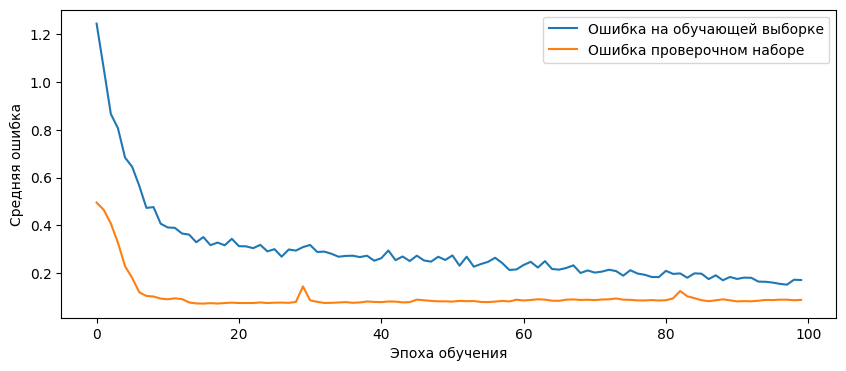

In [ ]:
x1 = BatchNormalization()(input1) 
x1 = Dense(1024, activation='relu') (x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(768, activation='sigmoid')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(512, activation='sigmoid')(x1)

x2 = Dense(100, activation='sigmoid') (input2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(100, activation='sigmoid') (x2)


x3 = Dense(100, activation='sigmoid') (input3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(100, activation='sigmoid') (x3)

x = concatenate([x1, x2, x3])

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear')(x)

model = Model((input1, input2, input3), x) 

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

history = model.fit((x_train, x_train_text1, x_train_text2), 
                    y_train, 
                    epochs= 100, 
                    validation_split = 0.3,
                    verbose=1, shuffle=True)

compare_sharp_loss(history,10,4) 

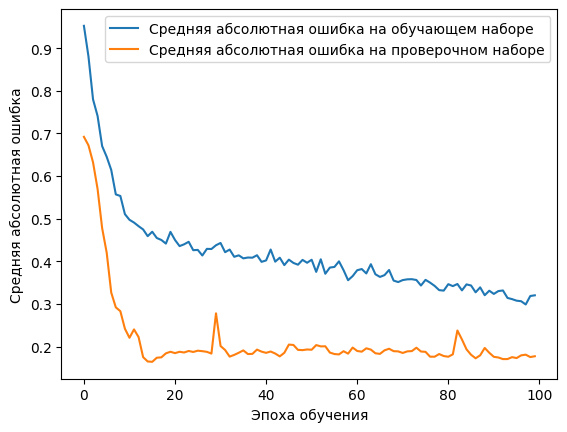

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

13/13 [==============================] - 1s 19ms/step


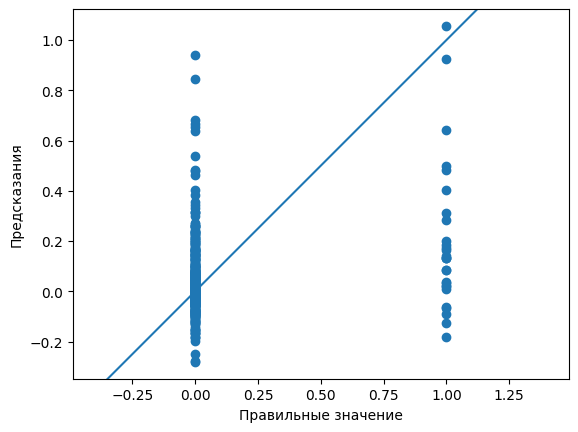

In [ ]:
pred = model.predict([x_test, x_test_text1, x_test_text2]) 
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000])
plt.show()

In [ ]:
m_l = []
s = 0
for i in range(0, len(y_test)):
    if np.round(y_test[i]) == np.round(pred[i]):
        s += 1
    dif = (y_test[i] - pred[i])**2
    print(y_test[i], pred[i], dif, np.round(y_test[i]), np.round(pred[i]))
    m_l.append(dif)

print('Среднеквадратичное отклонение', np.sqrt(np.mean(m_l)))
print('Точность модели', s / len(y_test))

0.0 [0.08420402] [0.00709032] 0.0 [0.]
0.0 [0.01071143] [0.00011473] 0.0 [0.]
0.0 [0.08436917] [0.00711816] 0.0 [0.]
0.0 [-0.24905229] [0.06202704] 0.0 [-0.]
1.0 [0.08313438] [0.8406425] 1.0 [0.]
0.0 [0.07115776] [0.00506343] 0.0 [0.]
0.0 [0.01783953] [0.00031825] 0.0 [0.]
0.0 [0.07488242] [0.00560738] 0.0 [0.]
0.0 [0.2354835] [0.05545248] 0.0 [0.]
0.0 [0.00525095] [2.757243e-05] 0.0 [0.]
0.0 [0.07488242] [0.00560738] 0.0 [0.]
0.0 [0.2398225] [0.05751484] 0.0 [0.]
1.0 [0.03677709] [0.9277984] 1.0 [0.]
0.0 [0.13697709] [0.01876272] 0.0 [0.]
0.0 [-0.08481264] [0.00719318] 0.0 [-0.]
0.0 [-0.09509186] [0.00904246] 0.0 [-0.]
0.0 [0.0726185] [0.00527345] 0.0 [0.]
0.0 [0.05055277] [0.00255558] 0.0 [0.]
1.0 [1.0560536] [0.00314201] 1.0 [1.]
0.0 [-0.02965813] [0.0008796] 0.0 [-0.]
0.0 [0.05113328] [0.00261461] 0.0 [0.]
1.0 [0.0332119] [0.93467927] 1.0 [0.]
0.0 [0.02839053] [0.00080602] 0.0 [0.]
0.0 [-0.04072136] [0.00165823] 0.0 [-0.]
0.0 [0.01581442] [0.0002501] 0.0 [0.]
0.0 [0.00441064] [1.94

________________________________________


____________________________________

_____________________________________________